# MODEL 1: LONG SHORT TERM MEMORY (LSTM)

Let's start my importing the necessary libraries

Adolescent Data

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense

Load the csv files directly from the folder 'adolescent' which contains 7 seven csv files

In [ ]:
import os
import pandas as pd

folder_path = '/content/drive/MyDrive/adolescent'

# List all files in the folder
files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initializing an empty DataFrame to store the combined data
combined_adolescent = pd.DataFrame()

Create a for loop to concatenate all the files and extract time features !

In [ ]:
# Looping through each file and concatenate the data
for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)  # Assuming the files are CSV

    # Drop specified columns
    df = df.drop(['HBGI', 'LBGI', 'BG', 'Risk'], axis=1)

    # Convert 'Time' column to datetime format
    df['Time'] = pd.to_datetime(df['Time'])

    # Extracting time features
    df['Hour'] = df['Time'].dt.hour
    df['Minute'] = df['Time'].dt.minute
    df['Second'] = df['Time'].dt.second

    combined_adolescent = pd.concat([combined_adolescent, df], ignore_index=True)

# Displaying the combined DataFrame with time features
print(combined_adolescent)

                     Time         CGM  CHO   insulin  Hour  Minute  Second
0     2023-10-25 06:00:00  136.435033  0.0  0.013933     6       0       0
1     2023-10-25 06:05:00  137.121412  0.0  0.013933     6       5       0
2     2023-10-25 06:10:00  138.398018  0.0  0.013933     6      10       0
3     2023-10-25 06:15:00  140.060899  0.0  0.013933     6      15       0
4     2023-10-25 06:20:00  141.830932  0.0  0.013933     6      20       0
...                   ...         ...  ...       ...   ...     ...     ...
10075 2023-10-30 05:35:00  103.932284  0.0  0.013117     5      35       0
10076 2023-10-30 05:40:00  104.771326  0.0  0.013117     5      40       0
10077 2023-10-30 05:45:00  105.500398  0.0  0.013117     5      45       0
10078 2023-10-30 05:50:00  106.112439  0.0  0.013117     5      50       0
10079 2023-10-30 05:55:00  106.608441  0.0  0.013117     5      55       0

[10080 rows x 7 columns]


In [ ]:
len(combined_adolescent) # number of rows in the dataframe

10080

In [ ]:
combined_adolescent

,Time,CGM,CHO,insulin,Hour,Minute,Second
0,2023-10-25 06:00:00,136.435033,0.0,0.013933,6,0,0
1,2023-10-25 06:05:00,137.121412,0.0,0.013933,6,5,0
2,2023-10-25 06:10:00,138.398018,0.0,0.013933,6,10,0
3,2023-10-25 06:15:00,140.060899,0.0,0.013933,6,15,0
4,2023-10-25 06:20:00,141.830932,0.0,0.013933,6,20,0
...,...,...,...,...,...,...,...
10075,2023-10-30 05:35:00,103.932284,0.0,0.013117,5,35,0
10076,2023-10-30 05:40:00,104.771326,0.0,0.013117,5,40,0
10077,2023-10-30 05:45:00,105.500398,0.0,0.013117,5,45,0
10078,2023-10-30 05:50:00,106.112439,0.0,0.013117,5,50,0


Visualization using heatmap fro CGM, CHO and Insulin

<ipython-input-37-c75e035523e7>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_data.corr()


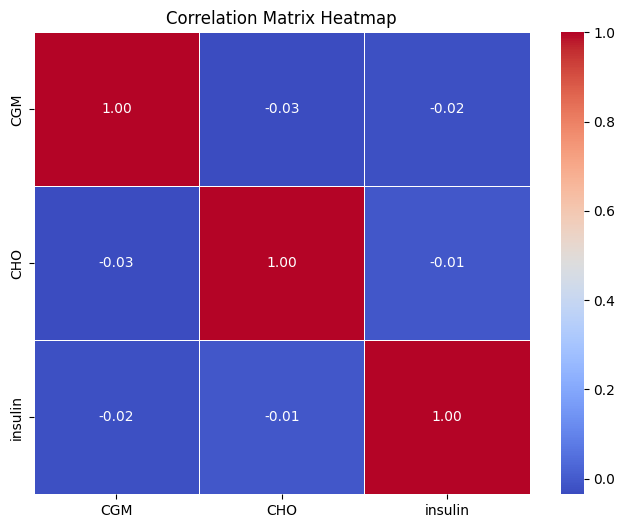

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
selected_columns = ['CGM', 'CHO', 'insulin', 'Time']
selected_data = combined_adolescent[selected_columns]

# Calculating the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


Visualization using line plot

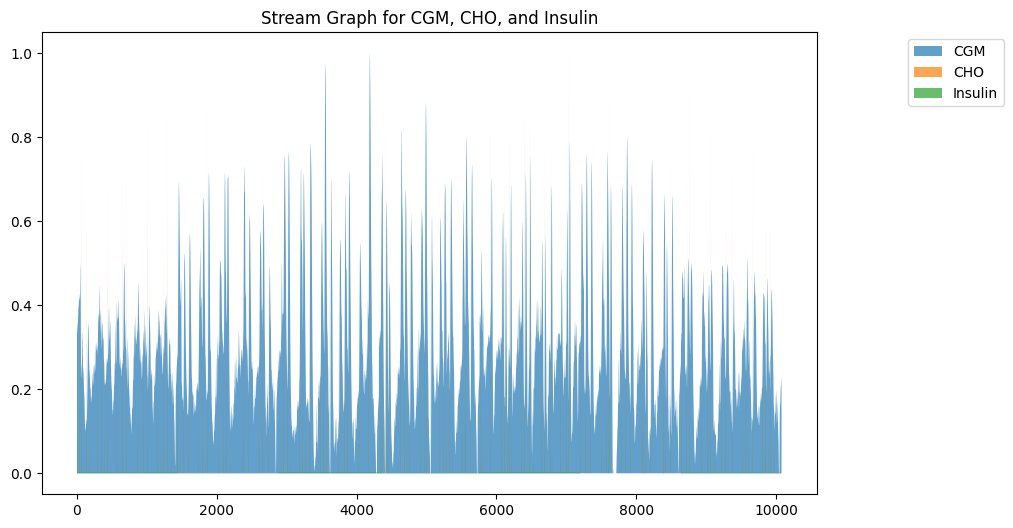

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select relevant columns
selected_columns = ['CGM', 'CHO', 'insulin']
selected_data = combined_adolescent[selected_columns]

# Normalize the data to be in the range [0, 1]
normalized_data = (selected_data - selected_data.min()) / (selected_data.max() - selected_data.min())

# Create a stream graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stream graph
ax.fill_between(normalized_data.index, normalized_data['CGM'], label='CGM', alpha=0.7)
ax.fill_between(normalized_data.index, normalized_data['CHO'], label='CHO', alpha=0.7)
ax.fill_between(normalized_data.index, normalized_data['insulin'], label='Insulin', alpha=0.7)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.title('Stream Graph for CGM, CHO, and Insulin')
plt.show()


Visualization using line plot on Plotly library

In [ ]:
import plotly.express as px

# Selecting relevant columns
selected_columns = ['CGM', 'CHO', 'insulin']
selected_data = combined_adolescent[selected_columns]

# Normalizing the data to be in the range [0, 1]
normalized_data = (selected_data - selected_data.min()) / (selected_data.max() - selected_data.min())

# Creating a line graph using Plotly Express
fig = px.line(normalized_data, x=normalized_data.index, y=selected_columns, labels={'index': 'Time', 'value': 'Normalized Values'},
              title='Line Graph for CGM, CHO, and Insulin')

# Show the figure
fig.show()


In [ ]:
# Drop the 'Time' column
combined_adolescent = combined_adolescent.drop('Time', axis=1)

# Display the updated DataFrame
print(combined_adolescent)

              CGM  CHO   insulin  Hour  Minute  Second
0      136.435033  0.0  0.013933     6       0       0
1      137.121412  0.0  0.013933     6       5       0
2      138.398018  0.0  0.013933     6      10       0
3      140.060899  0.0  0.013933     6      15       0
4      141.830932  0.0  0.013933     6      20       0
...           ...  ...       ...   ...     ...     ...
10075  103.932284  0.0  0.013117     5      35       0
10076  104.771326  0.0  0.013117     5      40       0
10077  105.500398  0.0  0.013117     5      45       0
10078  106.112439  0.0  0.013117     5      50       0
10079  106.608441  0.0  0.013117     5      55       0

[10080 rows x 6 columns]


Feature Engineering

In [ ]:
# creating Lag features
combined_adolescent['CGM_Lag1'] = combined_adolescent['CGM'].shift(1)
combined_adolescent['CHO_Lag1'] = combined_adolescent['CHO'].shift(1)
combined_adolescent['Insulin_Lag1'] = combined_adolescent['insulin'].shift(1)

# Computing rolling mean for CGM, CHO, and Insulin over a window of 3 time points
combined_adolescent['CGM_RollingMean3'] = combined_adolescent['CGM'].rolling(window=3).mean()
combined_adolescent['CHO_RollingMean3'] = combined_adolescent['CHO'].rolling(window=3).mean()
combined_adolescent['Insulin_RollingMean3'] = combined_adolescent['insulin'].rolling(window=3).mean()

# Interaction features
combined_adolescent['CGM_Insulin_Interact'] = combined_adolescent['CGM'] * combined_adolescent['insulin']
combined_adolescent['CHO_Insulin_Interact'] = combined_adolescent['CHO'] * combined_adolescent['insulin']

# Createinga limited memory past (the past 24 hours)
memory_window = 24
combined_adolescent['Memory_Window_CGM_Mean'] = combined_adolescent['CGM'].rolling(window=memory_window).mean()
combined_adolescent['Memory_Window_CHO_Sum'] = combined_adolescent['CHO'].rolling(window=memory_window).sum()
combined_adolescent['Memory_Window_Insulin_Sum'] = combined_adolescent['insulin'].rolling(window=memory_window).sum()

# Create a future carbohydrates intake feature if it falls within 2 hours of prediction
future_window = 2
combined_adolescent['Future_CHO'] = combined_adolescent['CHO'].shift(-future_window)

# Combine features for the whole past data and limited memory past
combined_adolescent['Whole_Past_CGM_Mean'] = combined_adolescent['CGM'].expanding().mean()
combined_adolescent['Whole_Past_CHO_Sum'] = combined_adolescent['CHO'].expanding().sum()
combined_adolescent['Whole_Past_Insulin_Sum'] = combined_adolescent['insulin'].expanding().sum()

# Fill NaN values with the average of each column
combined_adolescent = combined_adolescent.fillna(combined_adolescent.mean())

# Display the updated DataFrame
print(combined_adolescent)


              CGM  CHO   insulin  Hour  Minute  Second    CGM_Lag1  CHO_Lag1  \
0      136.435033  0.0  0.013933     6       0       0  126.855151  0.137395   
1      137.121412  0.0  0.013933     6       5       0  136.435033  0.000000   
2      138.398018  0.0  0.013933     6      10       0  137.121412  0.000000   
3      140.060899  0.0  0.013933     6      15       0  138.398018  0.000000   
4      141.830932  0.0  0.013933     6      20       0  140.060899  0.000000   
...           ...  ...       ...   ...     ...     ...         ...       ...   
10075  103.932284  0.0  0.013117     5      35       0  103.024536  0.000000   
10076  104.771326  0.0  0.013117     5      40       0  103.932284  0.000000   
10077  105.500398  0.0  0.013117     5      45       0  104.771326  0.000000   
10078  106.112439  0.0  0.013117     5      50       0  105.500398  0.000000   
10079  106.608441  0.0  0.013117     5      55       0  106.112439  0.000000   

       Insulin_Lag1  CGM_RollingMean3  

Checking for NaN values in the columns

In [ ]:
# Checking for NaN values in the columns
nan_values = combined_adolescent.isnull().sum()

# Displaying the NaN values
print("NaN values in each column:")
print(nan_values)

NaN values in each column:
CGM                          0
CHO                          0
insulin                      0
Hour                         0
Minute                       0
Second                       0
CGM_Lag1                     0
CHO_Lag1                     0
Insulin_Lag1                 0
CGM_RollingMean3             0
CHO_RollingMean3             0
Insulin_RollingMean3         0
CGM_Insulin_Interact         0
CHO_Insulin_Interact         0
Memory_Window_CGM_Mean       0
Memory_Window_CHO_Sum        0
Memory_Window_Insulin_Sum    0
Future_CHO                   0
Whole_Past_CGM_Mean          0
Whole_Past_CHO_Sum           0
Whole_Past_Insulin_Sum       0
dtype: int64


stating the conditions to effect hypoglaemia and hyperglycaemia

In [ ]:
import pandas as pd

combined_adolescent['Target'] = 1  # Initialize the target column with 1 for normal

# Define conditions for hypoglycemia and hyperglycemia
hypoglycemia_condition = (combined_adolescent['CGM'].shift(-2 * (60 // 5)) < 70)
hyperglycemia_condition = (combined_adolescent['CGM'].shift(-2 * (60 // 5)) > 180)

# Set the target column based on the conditions
combined_adolescent.loc[hypoglycemia_condition, 'Target'] = 0  # Set to 0 for hypoglycemia
combined_adolescent.loc[hyperglycemia_condition, 'Target'] = 2   # Set to 2 for hyperglycemia

# Ensuring that no future CGM data is used for prediction
combined_adolescent['CGM'] = combined_adolescent['CGM'].shift(1)

# Drop rows with NaN values in the 'CGM' column after the adjustment
combined_adolescent = combined_adolescent.dropna(subset=['CGM'])

# Display the updated DataFrame with the target column
print(combined_adolescent)


              CGM  CHO   insulin  Hour  Minute  Second    CGM_Lag1  CHO_Lag1  \
1      136.435033  0.0  0.013933     6       5       0  136.435033       0.0   
2      137.121412  0.0  0.013933     6      10       0  137.121412       0.0   
3      138.398018  0.0  0.013933     6      15       0  138.398018       0.0   
4      140.060899  0.0  0.013933     6      20       0  140.060899       0.0   
5      141.830932  0.0  0.013933     6      25       0  141.830932       0.0   
...           ...  ...       ...   ...     ...     ...         ...       ...   
10075  103.024536  0.0  0.013117     5      35       0  103.024536       0.0   
10076  103.932284  0.0  0.013117     5      40       0  103.932284       0.0   
10077  104.771326  0.0  0.013117     5      45       0  104.771326       0.0   
10078  105.500398  0.0  0.013117     5      50       0  105.500398       0.0   
10079  106.112439  0.0  0.013117     5      55       0  106.112439       0.0   

       Insulin_Lag1  CGM_RollingMean3  

Visualization of a Sequence Plot for CGM, CHO and insulin

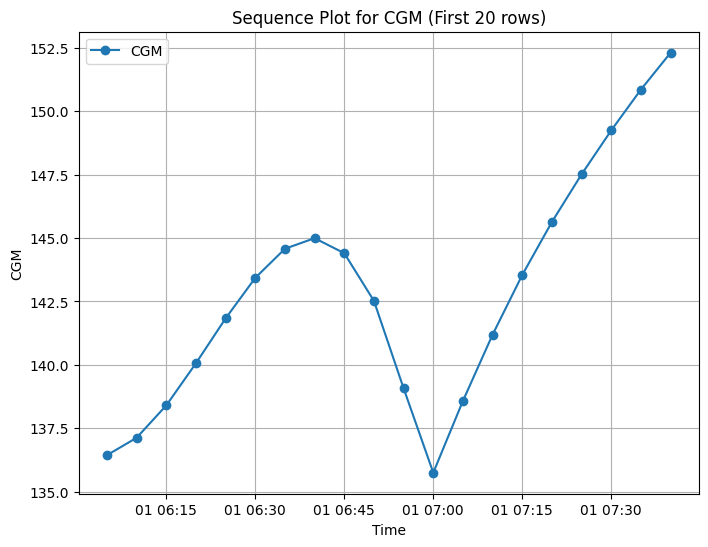

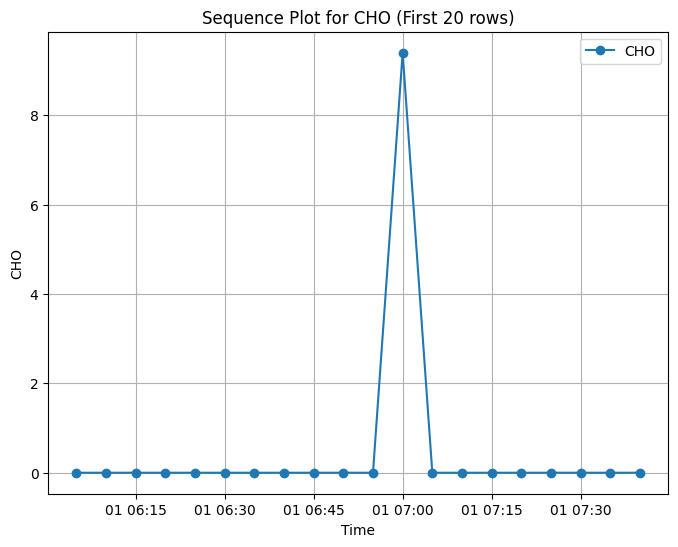

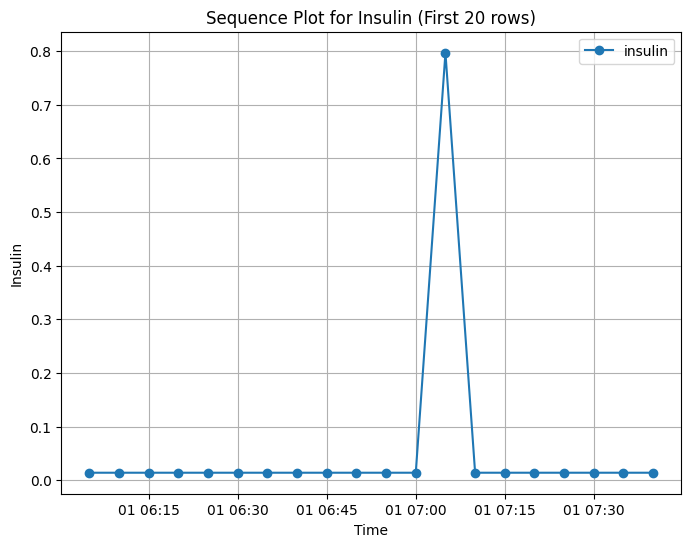

In [ ]:
# Creating a synthetic 'Time' column
combined_adolescent['Time'] = combined_adolescent.apply(lambda row: pd.Timestamp(2023, 1, 1, int(row['Hour']), int(row['Minute'])), axis=1)

# Plotting sequence for CGM (first 20 rows)
plt.figure(figsize=(8, 6))
plt.plot(combined_adolescent['Time'].head(20), combined_adolescent['CGM'].head(20), label='CGM', marker='o')
plt.title('Sequence Plot for CGM (First 20 rows)')
plt.xlabel('Time')
plt.ylabel('CGM')
plt.legend()
plt.grid(True)
plt.show()

# Plotting sequence for CHO (first 20 rows)
plt.figure(figsize=(8, 6))
plt.plot(combined_adolescent['Time'].head(20), combined_adolescent['CHO'].head(20), label='CHO', marker='o')
plt.title('Sequence Plot for CHO (First 20 rows)')
plt.xlabel('Time')
plt.ylabel('CHO')
plt.legend()
plt.grid(True)
plt.show()

# Plotting sequence for Insulin (first 20 rows)
plt.figure(figsize=(8, 6))
plt.plot(combined_adolescent['Time'].head(20), combined_adolescent['insulin'].head(20), label='insulin', marker='o')
plt.title('Sequence Plot for Insulin (First 20 rows)')
plt.xlabel('Time')
plt.ylabel('Insulin')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Drop the 'Time' column
combined_adolescent = combined_adolescent.drop('Time', axis=1)

# Displaying the updated DataFrame
print(combined_adolescent)

              CGM  CHO   insulin  Hour  Minute  Second    CGM_Lag1  CHO_Lag1  \
1      136.435033  0.0  0.013933     6       5       0  136.435033       0.0   
2      137.121412  0.0  0.013933     6      10       0  137.121412       0.0   
3      138.398018  0.0  0.013933     6      15       0  138.398018       0.0   
4      140.060899  0.0  0.013933     6      20       0  140.060899       0.0   
5      141.830932  0.0  0.013933     6      25       0  141.830932       0.0   
...           ...  ...       ...   ...     ...     ...         ...       ...   
10075  103.024536  0.0  0.013117     5      35       0  103.024536       0.0   
10076  103.932284  0.0  0.013117     5      40       0  103.932284       0.0   
10077  104.771326  0.0  0.013117     5      45       0  104.771326       0.0   
10078  105.500398  0.0  0.013117     5      50       0  105.500398       0.0   
10079  106.112439  0.0  0.013117     5      55       0  106.112439       0.0   

       Insulin_Lag1  CGM_RollingMean3  

Using the describe function for statistical analysis of the dataset

In [ ]:
combined_adolescent.describe()

,CGM,CHO,insulin,Hour,Minute,Second,CGM_Lag1,CHO_Lag1,Insulin_Lag1,CGM_RollingMean3,...,CGM_Insulin_Interact,CHO_Insulin_Interact,Memory_Window_CGM_Mean,Memory_Window_CHO_Sum,Memory_Window_Insulin_Sum,Future_CHO,Whole_Past_CGM_Mean,Whole_Past_CHO_Sum,Whole_Past_Insulin_Sum,Target
count,10079.000000,10079.000000,10079.000000,10079.000000,10079.000000,10079.0,10079.000000,10079.000000,10079.000000,10079.000000,...,10079.000000,10079.000000,10079.000000,10079.000000,10079.000000,10079.000000,10079.000000,10079.000000,10079.000000,10079.000000
mean,126.855151,0.137395,0.024210,11.500546,27.502728,0.0,126.855151,0.137395,0.024210,126.854194,...,2.940784,0.001749,126.865995,3.294402,0.580814,0.137422,126.651069,681.272845,121.101028,1.063002
std,48.451015,1.361130,0.116964,6.922657,17.259801,0.0,48.451015,1.361130,0.116964,48.310831,...,13.856600,0.017467,42.116477,5.848705,0.518251,1.361129,3.539783,399.024812,72.217178,0.468601
min,39.000000,0.000000,0.010108,0.000000,0.000000,0.0,39.000000,0.000000,0.010108,39.000000,...,0.394225,0.000000,39.000000,0.000000,0.242600,0.000000,114.939468,0.000000,0.027867,0.000000
25%,92.446411,0.000000,0.010800,5.500000,15.000000,0.0,92.446411,0.000000,0.010800,92.585055,...,1.140467,0.000000,96.326633,0.000000,0.289000,0.000000,125.709023,331.000000,55.400842,1.000000
50%,118.684019,0.000000,0.013117,12.000000,30.000000,0.0,118.684019,0.000000,0.013117,118.694634,...,1.542640,0.000000,122.115681,0.000000,0.349400,0.000000,127.370377,669.400000,116.812592,1.000000
75%,151.017156,0.000000,0.014558,17.500000,42.500000,0.0,151.017156,0.000000,0.014558,150.965023,...,1.994662,0.000000,152.161934,3.000000,0.685283,0.000000,128.694173,1013.400000,189.147012,1.000000
max,332.603426,20.200000,2.557450,23.000000,55.000000,0.0,332.603426,20.200000,2.557450,331.776759,...,363.057922,0.279520,295.204481,22.800000,2.893058,20.200000,156.277731,1384.800000,244.022617,2.000000


In [ ]:
features = combined_adolescent.drop(['Target'], axis=1).values  # Drop 'Target' column
target = combined_adolescent['Target'].values

In [ ]:
features.shape

(10079, 21)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

Using MinMaxScaler to normalize the data between 0 and 1

In [ ]:
# Normalizing the features using StandardScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
target_categorical = to_categorical(target)

# Define the window size
window_size = 10

# Creating sequences of input features and corresponding target variable
X, y = [], []
for i in range(len(features_scaled) - window_size):
    X.append(features_scaled[i:i+window_size])
    y.append(target_categorical[i+window_size])

X, y = np.array(X), np.array(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Displaying the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8055, 10, 21)
X_test shape: (2014, 10, 21)
y_train shape: (8055, 3)
y_test shape: (2014, 3)


Create a simple LSTM model

In [ ]:
from tensorflow.keras.utils import plot_model

# Creating an LSTM model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(window_size, features.shape[1])))
model.add(Dense(3, activation='softmax'))  # 3 classes for hypoglycemia, normal, and hyperglycemia

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=128, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/128
252/252 [==============================] - 4s 11ms/step - loss: 0.6324 - accuracy: 0.7780 - val_loss: 0.5898 - val_accuracy: 0.7850
Epoch 2/128
252/252 [==============================] - 3s 13ms/step - loss: 0.5477 - accuracy: 0.7922 - val_loss: 0.4923 - val_accuracy: 0.8014
Epoch 3/128
252/252 [==============================] - 3s 12ms/step - loss: 0.4855 - accuracy: 0.8034 - val_loss: 0.4705 - val_accuracy: 0.8054
Epoch 4/128
252/252 [==============================] - 3s 11ms/step - loss: 0.4590 - accuracy: 0.8048 - val_loss: 0.4407 - val_accuracy: 0.8163
Epoch 5/128
252/252 [==============================] - 3s 10ms/step - loss: 0.4434 - accuracy: 0.8087 - val_loss: 0.4260 - val_accuracy: 0.8227
Epoch 6/128
252/252 [==============================] - 3s 11ms/step - loss: 0.4262 - accuracy: 0.8175 - val_loss: 0.4086 - val_accuracy: 0.8297
Epoch 7/128
252/252 [==============================] - 4s 14ms/step - loss: 0.4173 - accuracy: 0.8230 - val_loss: 0.4050 - val_accuracy:

Model Plot

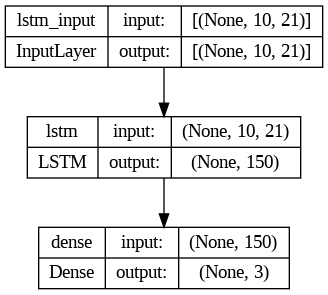

In [ ]:
plot_model(model, to_file='saved_model_plot.png', show_shapes=True, show_layer_names=True)

Evaluation

In [ ]:
# Evaluating the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy on the test set:", accuracy)

63/63 [==============================] - 1s 7ms/step
Accuracy on the test set: 0.9513406156901688


In [ ]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       166
           1       0.97      0.97      0.97      1571
           2       0.90      0.89      0.90       277

    accuracy                           0.95      2014
   macro avg       0.92      0.90      0.91      2014
weighted avg       0.95      0.95      0.95      2014



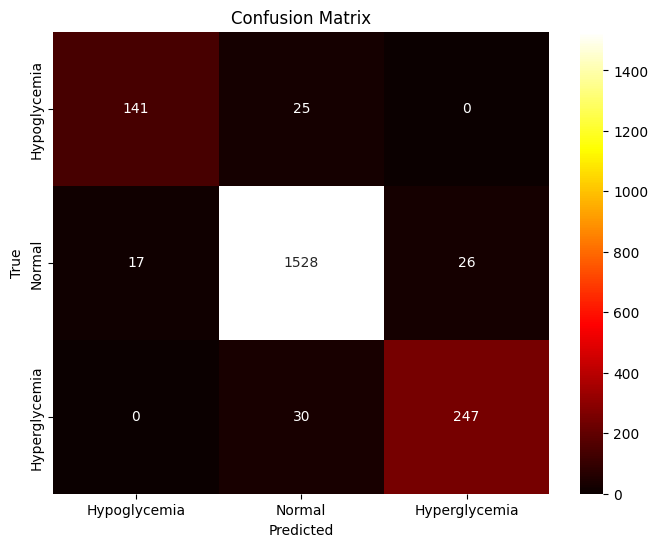

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='hot', xticklabels=['Hypoglycemia', 'Normal', 'Hyperglycemia'],
            yticklabels=['Hypoglycemia', 'Normal', 'Hyperglycemia'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

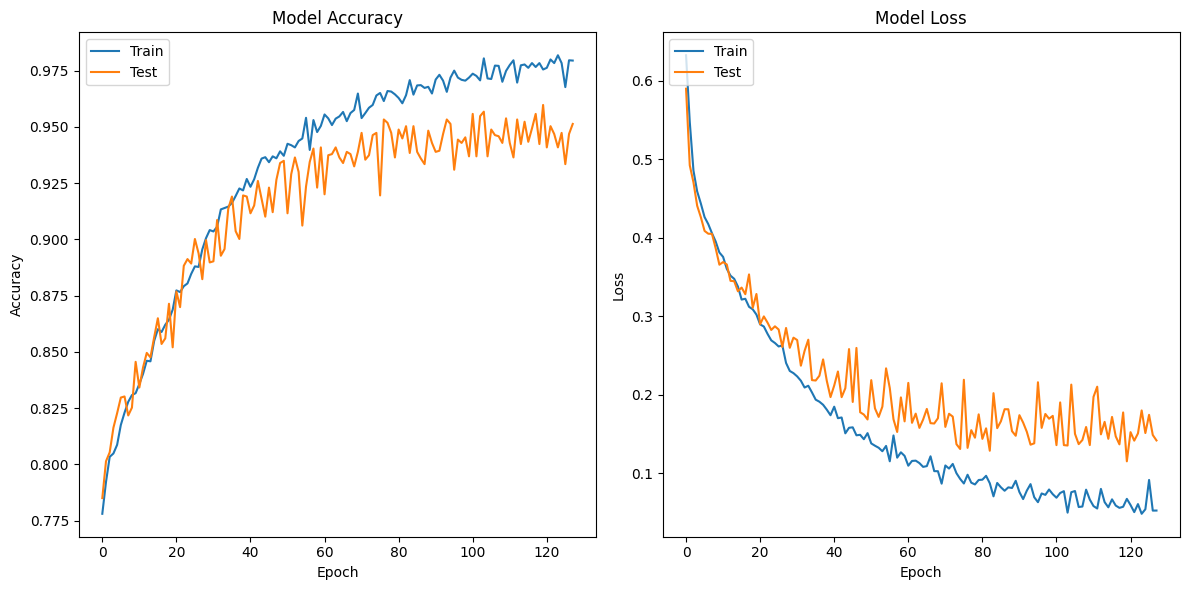

In [ ]:
# Plot the training curve
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

Adult Data

In [ ]:
folder_path = '/content/drive/MyDrive/adult'

# List all files in the folder
files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initializing an empty DataFrame to store the combined data
combined_adult = pd.DataFrame()

In [ ]:
# Loop through each file and concatenate the data
for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)  # Assuming the files are CSV

    # Drop specified columns
    df = df.drop(['HBGI', 'LBGI', 'BG', 'Risk'], axis=1)

    # Convert 'Time' column to datetime format
    df['Time'] = pd.to_datetime(df['Time'])

    # Extract time features
    df['Hour'] = df['Time'].dt.hour
    df['Minute'] = df['Time'].dt.minute
    df['Second'] = df['Time'].dt.second

    combined_adult = pd.concat([combined_adult, df], ignore_index=True)

# Displaying the combined DataFrame with time features
print(combined_adult)

                     Time         CGM   CHO   insulin  Hour  Minute  Second
0     2023-10-25 06:00:00   69.190114   0.0  0.021125     6       0       0
1     2023-10-25 06:05:00   69.971869  11.6  0.021125     6       5       0
2     2023-10-25 06:10:00   71.353649   0.0  1.181125     6      10       0
3     2023-10-25 06:15:00   73.143549   0.0  0.021125     6      15       0
4     2023-10-25 06:20:00   75.179031   0.0  0.021125     6      20       0
...                   ...         ...   ...       ...   ...     ...     ...
14395 2023-10-30 05:35:00  103.254842   0.0  0.016975     5      35       0
14396 2023-10-30 05:40:00  105.680250   0.0  0.016975     5      40       0
14397 2023-10-30 05:45:00  110.110340   0.0  0.016975     5      45       0
14398 2023-10-30 05:50:00  117.215109   0.0  0.016975     5      50       0
14399 2023-10-30 05:55:00  126.941156   0.0  0.016975     5      55       0

[14400 rows x 7 columns]


Visualization Using heatmap for CGM, CHO and insulin

<ipython-input-602-40508c89c64c>:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



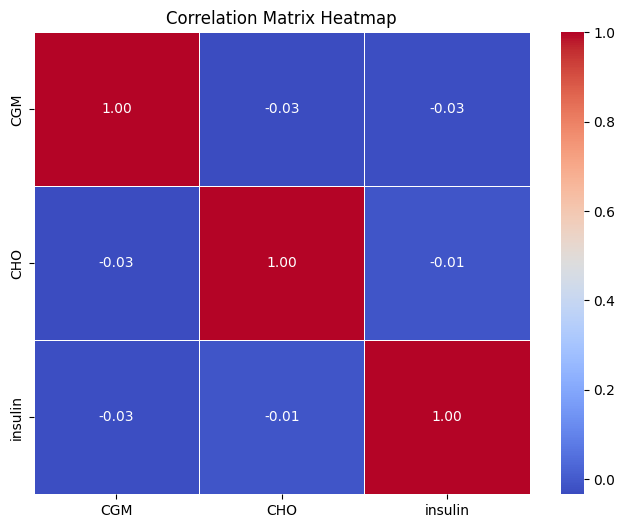

In [ ]:
# Selecting relevant columns
selected_columns = ['CGM', 'CHO', 'insulin', 'Time']
selected_data = combined_adult[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Visualization of CGM, CHO, and insulin using line Plot

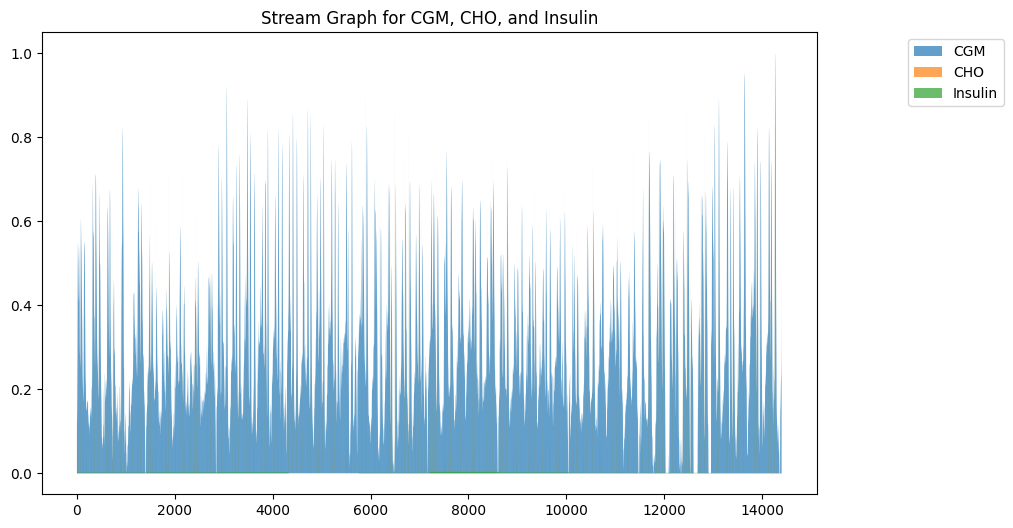

In [ ]:
# Select relevant columns
selected_columns = ['CGM', 'CHO', 'insulin']
selected_data = combined_adult[selected_columns]

# Normalizing the data to be in the range [0, 1]
normalized_data = (selected_data - selected_data.min()) / (selected_data.max() - selected_data.min())

# Create a stream graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stream graph
ax.fill_between(normalized_data.index, normalized_data['CGM'], label='CGM', alpha=0.7)
ax.fill_between(normalized_data.index, normalized_data['CHO'], label='CHO', alpha=0.7)
ax.fill_between(normalized_data.index, normalized_data['insulin'], label='Insulin', alpha=0.7)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.title('Stream Graph for CGM, CHO, and Insulin')
plt.show()

Visualization Uisng Plotly

In [ ]:
# Select relevant columns
selected_columns = ['CGM', 'CHO', 'insulin']
selected_data = combined_adult[selected_columns]

# Normalizing the data to be in the range [0, 1]
normalized_data = (selected_data - selected_data.min()) / (selected_data.max() - selected_data.min())

# Create a line graph using Plotly Express
fig = px.line(normalized_data, x=normalized_data.index, y=selected_columns, labels={'index': 'Time', 'value': 'Normalized Values'},
              title='Line Graph for CGM, CHO, and Insulin')

# Show the figure
fig.show()

Drop Time column

In [ ]:
# Drop the 'Time' column
combined_adult = combined_adult.drop('Time', axis=1)

# Display the updated DataFrame
print(combined_adult)

              CGM   CHO   insulin  Hour  Minute  Second
0       69.190114   0.0  0.021125     6       0       0
1       69.971869  11.6  0.021125     6       5       0
2       71.353649   0.0  1.181125     6      10       0
3       73.143549   0.0  0.021125     6      15       0
4       75.179031   0.0  0.021125     6      20       0
...           ...   ...       ...   ...     ...     ...
14395  103.254842   0.0  0.016975     5      35       0
14396  105.680250   0.0  0.016975     5      40       0
14397  110.110340   0.0  0.016975     5      45       0
14398  117.215109   0.0  0.016975     5      50       0
14399  126.941156   0.0  0.016975     5      55       0

[14400 rows x 6 columns]


Feature Engineering for Adult Data

In [ ]:
combined_adult['CGM_Lag1'] = combined_adult['CGM'].shift(1)
combined_adult['CHO_Lag1'] = combined_adult['CHO'].shift(1)
combined_adult['Insulin_Lag1'] = combined_adult['insulin'].shift(1)

# Computing rolling mean for CGM, CHO, and Insulin over a window of 3 time points
combined_adult['CGM_RollingMean3'] = combined_adult['CGM'].rolling(window=3).mean()
combined_adult['CHO_RollingMean3'] = combined_adult['CHO'].rolling(window=3).mean()
combined_adult['Insulin_RollingMean3'] = combined_adult['insulin'].rolling(window=3).mean()

# Interaction features
combined_adult['CGM_Insulin_Interact'] = combined_adult['CGM'] * combined_adult['insulin']
combined_adult['CHO_Insulin_Interact'] = combined_adult['CHO'] * combined_adult['insulin']

# Creating a limited memory past (using the past 24 hours)
memory_window = 24
combined_adult['Memory_Window_CGM_Mean'] = combined_adult['CGM'].rolling(window=memory_window).mean()
combined_adult['Memory_Window_CHO_Sum'] = combined_adult['CHO'].rolling(window=memory_window).sum()
combined_adult['Memory_Window_Insulin_Sum'] = combined_adult['insulin'].rolling(window=memory_window).sum()

# Creating a future carbohydrates intake feature if it falls within 2 hours of prediction
future_window = 2
combined_adult['Future_CHO'] = combined_adult['CHO'].shift(-future_window)

# Combine features for the whole past data and limited memory past
combined_adult['Whole_Past_CGM_Mean'] = combined_adult['CGM'].expanding().mean()
combined_adult['Whole_Past_CHO_Sum'] = combined_adult['CHO'].expanding().sum()
combined_adult['Whole_Past_Insulin_Sum'] = combined_adult['insulin'].expanding().sum()

# Fill NaN values with the average of each column
combined_adult = combined_adult.fillna(combined_adult.mean())

# Display the updated DataFrame
print(combined_adult)

              CGM   CHO   insulin  Hour  Minute  Second    CGM_Lag1  \
0       69.190114   0.0  0.021125     6       0       0  118.864952   
1       69.971869  11.6  0.021125     6       5       0   69.190114   
2       71.353649   0.0  1.181125     6      10       0   69.971869   
3       73.143549   0.0  0.021125     6      15       0   71.353649   
4       75.179031   0.0  0.021125     6      20       0   73.143549   
...           ...   ...       ...   ...     ...     ...         ...   
14395  103.254842   0.0  0.016975     5      35       0  101.782363   
14396  105.680250   0.0  0.016975     5      40       0  103.254842   
14397  110.110340   0.0  0.016975     5      45       0  105.680250   
14398  117.215109   0.0  0.016975     5      50       0  110.110340   
14399  126.941156   0.0  0.016975     5      55       0  117.215109   

        CHO_Lag1  Insulin_Lag1  CGM_RollingMean3  ...  Insulin_RollingMean3  \
0       0.136968      0.038370        118.868609  ...              0

A Sequence Plot

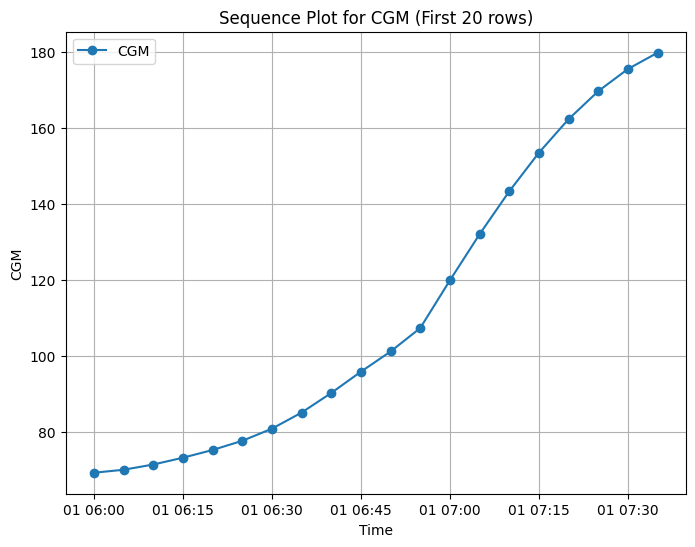

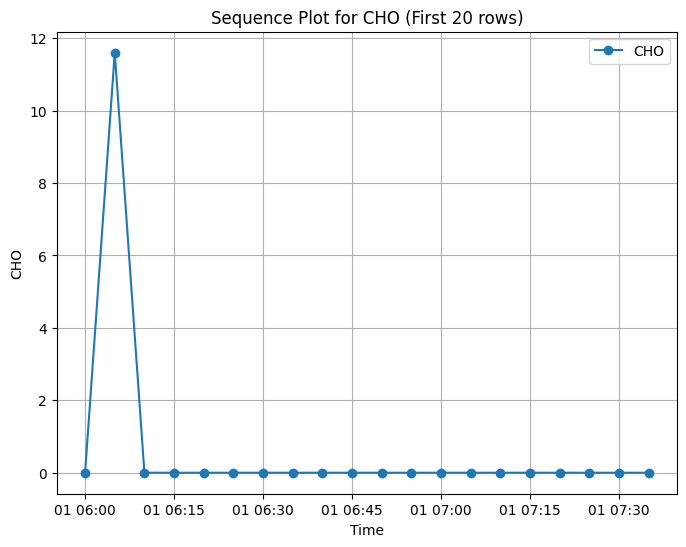

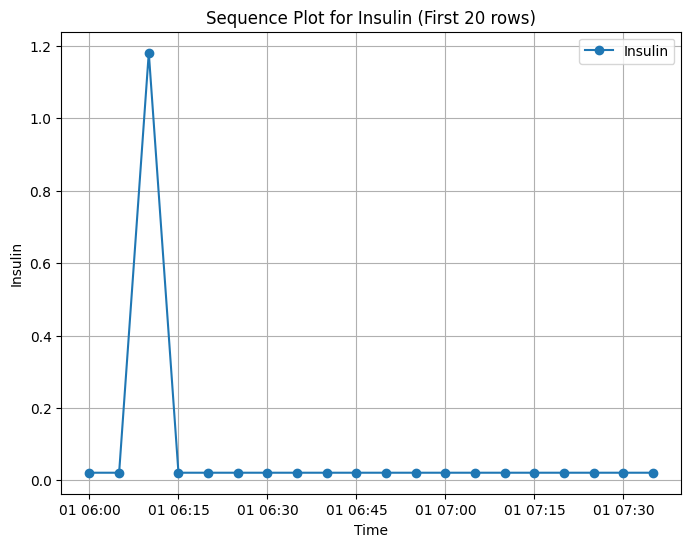

In [ ]:
# Creating a synthetic 'Time' column
combined_adult['Time'] = combined_adult.apply(lambda row: pd.Timestamp(2023, 1, 1, int(row['Hour']), int(row['Minute'])), axis=1)

# Plotting sequence for CGM (first 20 rows)
plt.figure(figsize=(8, 6))
plt.plot(combined_adult['Time'].head(20), combined_adult['CGM'].head(20), label='CGM', marker='o')
plt.title('Sequence Plot for CGM (First 20 rows)')
plt.xlabel('Time')
plt.ylabel('CGM')
plt.legend()
plt.grid(True)
plt.show()

# Plotting sequence for CHO (first 20 rows)
plt.figure(figsize=(8, 6))
plt.plot(combined_adult['Time'].head(20), combined_adult['CHO'].head(20), label='CHO', marker='o')
plt.title('Sequence Plot for CHO (First 20 rows)')
plt.xlabel('Time')
plt.ylabel('CHO')
plt.legend()
plt.grid(True)
plt.show()

# Plotting sequence for Insulin (first 20 rows)
plt.figure(figsize=(8, 6))
plt.plot(combined_adult['Time'].head(20), combined_adult['insulin'].head(20), label='Insulin', marker='o')
plt.title('Sequence Plot for Insulin (First 20 rows)')
plt.xlabel('Time')
plt.ylabel('Insulin')
plt.legend()
plt.grid(True)
plt.show()


Because we created sequence Plot using the Timestamp, we drop it again

In [ ]:
# Drop the 'Time' column
combined_adult = combined_adult.drop('Time', axis=1)

# Display the updated DataFrame
print(combined_adult)

              CGM   CHO   insulin  Hour  Minute  Second    CGM_Lag1  \
0       69.190114   0.0  0.021125     6       0       0  118.864952   
1       69.971869  11.6  0.021125     6       5       0   69.190114   
2       71.353649   0.0  1.181125     6      10       0   69.971869   
3       73.143549   0.0  0.021125     6      15       0   71.353649   
4       75.179031   0.0  0.021125     6      20       0   73.143549   
...           ...   ...       ...   ...     ...     ...         ...   
14395  103.254842   0.0  0.016975     5      35       0  101.782363   
14396  105.680250   0.0  0.016975     5      40       0  103.254842   
14397  110.110340   0.0  0.016975     5      45       0  105.680250   
14398  117.215109   0.0  0.016975     5      50       0  110.110340   
14399  126.941156   0.0  0.016975     5      55       0  117.215109   

        CHO_Lag1  Insulin_Lag1  CGM_RollingMean3  ...  Insulin_RollingMean3  \
0       0.136968      0.038370        118.868609  ...              0

In [ ]:
combined_adult['Target'] = 1  # Initialize the target column with 1 for normal

# Define conditions for hypoglycemia and hyperglycemia
hypoglycemia_condition = (combined_adult['CGM'].shift(-2 * (60 // 5)) < 70)
hyperglycemia_condition = (combined_adult['CGM'].shift(-2 * (60 // 5)) > 180)

# Set the target column based on the conditions
combined_adult.loc[hypoglycemia_condition, 'Target'] = 0  # Set to 0 for hypoglycemia
combined_adult.loc[hyperglycemia_condition, 'Target'] = 2   # Set to 2 for hyperglycemia

# Ensure that no future CGM data is used for prediction
combined_adult['CGM'] = combined_adult['CGM'].shift(1)

# Drop rows with NaN values in the 'CGM' column after the adjustment
combined_adult = combined_adult.dropna(subset=['CGM'])

# Display the updated DataFrame with the target column
print(combined_adult)

              CGM   CHO   insulin  Hour  Minute  Second    CGM_Lag1  CHO_Lag1  \
1       69.190114  11.6  0.021125     6       5       0   69.190114       0.0   
2       69.971869   0.0  1.181125     6      10       0   69.971869      11.6   
3       71.353649   0.0  0.021125     6      15       0   71.353649       0.0   
4       73.143549   0.0  0.021125     6      20       0   73.143549       0.0   
5       75.179031   0.0  0.021125     6      25       0   75.179031       0.0   
...           ...   ...       ...   ...     ...     ...         ...       ...   
14395  101.782363   0.0  0.016975     5      35       0  101.782363       0.0   
14396  103.254842   0.0  0.016975     5      40       0  103.254842       0.0   
14397  105.680250   0.0  0.016975     5      45       0  105.680250       0.0   
14398  110.110340   0.0  0.016975     5      50       0  110.110340       0.0   
14399  117.215109   0.0  0.016975     5      55       0  117.215109       0.0   

       Insulin_Lag1  CGM_Ro

In [ ]:
combined_adult.describe().T

,count,mean,std,min,25%,50%,75%,max
CGM,14399.0,118.864952,47.421576,39.000000,83.837841,109.424379,146.379891,303.009908
CHO,14399.0,0.136968,1.352517,0.000000,0.000000,0.000000,0.000000,21.400000
insulin,14399.0,0.038369,0.188766,0.014800,0.018900,0.021125,0.022858,4.296975
Hour,14399.0,11.500382,6.922516,0.000000,5.500000,12.000000,17.500000,23.000000
Minute,14399.0,27.501910,17.259940,0.000000,15.000000,30.000000,42.500000,55.000000
Second,14399.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CGM_Lag1,14399.0,118.864952,47.421576,39.000000,83.837841,109.424379,146.379891,303.009908
CHO_Lag1,14399.0,0.136968,1.352517,0.000000,0.000000,0.000000,0.000000,21.400000
Insulin_Lag1,14399.0,0.038370,0.188766,0.014800,0.018900,0.021125,0.022858,4.296975
CGM_RollingMean3,14399.0,118.868609,47.285054,39.000000,83.918822,109.442769,146.439566,302.390836


In [ ]:
features = combined_adult.drop(['Target'], axis=1).values  # Drop 'Target' column
target = combined_adult['Target'].values

In [ ]:
features.shape

(14399, 21)

In [ ]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

One-Hot encoding the 'target' variable column

In [ ]:
target_categorical = to_categorical(target)

# Define the window size
window_size = 10

# Create sequences of input features and corresponding target variable
X, y = [], []
for i in range(len(features_scaled) - window_size):
    X.append(features_scaled[i:i+window_size])
    y.append(target_categorical[i+window_size])

X, y = np.array(X), np.array(y)

In [ ]:
X.shape

(14389, 10, 21)

Traing-Test Split

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11511, 10, 21)
X_test shape: (2878, 10, 21)
y_train shape: (11511, 3)
y_test shape: (2878, 3)


Training

In [ ]:
# Create an LSTM model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(window_size, features.shape[1])))
model.add(Dense(3, activation='softmax'))  # 3 classes for hypoglycemia, normal, and hyperglycemia

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=128, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/128
360/360 [==============================] - 6s 14ms/step - loss: 0.6648 - accuracy: 0.7573 - val_loss: 0.5808 - val_accuracy: 0.7728
Epoch 2/128
360/360 [==============================] - 4s 10ms/step - loss: 0.5594 - accuracy: 0.7732 - val_loss: 0.5460 - val_accuracy: 0.7943
Epoch 3/128
360/360 [==============================] - 4s 11ms/step - loss: 0.5323 - accuracy: 0.7777 - val_loss: 0.4993 - val_accuracy: 0.8006
Epoch 4/128
360/360 [==============================] - 5s 13ms/step - loss: 0.5055 - accuracy: 0.7920 - val_loss: 0.4991 - val_accuracy: 0.7891
Epoch 5/128
360/360 [==============================] - 4s 11ms/step - loss: 0.4919 - accuracy: 0.7935 - val_loss: 0.4738 - val_accuracy: 0.8026
Epoch 6/128
360/360 [==============================] - 4s 11ms/step - loss: 0.4799 - accuracy: 0.7986 - val_loss: 0.4676 - val_accuracy: 0.7995
Epoch 7/128
360/360 [==============================] - 5s 14ms/step - loss: 0.4705 - accuracy: 0.8008 - val_loss: 0.4827 - val_accuracy:

Evaluation

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy on the test set:", accuracy)

90/90 [==============================] - 0s 3ms/step
Accuracy on the test set: 0.9388464211257818


In [ ]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       339
           1       0.95      0.97      0.96      2171
           2       0.91      0.84      0.87       368

    accuracy                           0.94      2878
   macro avg       0.92      0.88      0.90      2878
weighted avg       0.94      0.94      0.94      2878



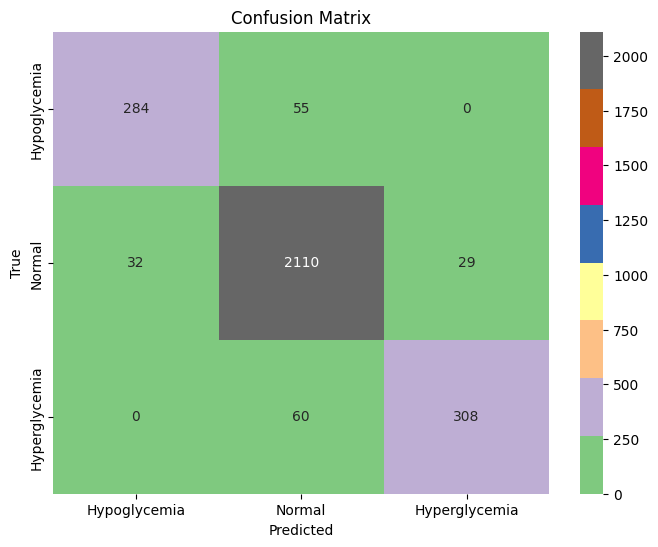

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Accent', xticklabels=['Hypoglycemia', 'Normal', 'Hyperglycemia'],
            yticklabels=['Hypoglycemia', 'Normal', 'Hyperglycemia'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

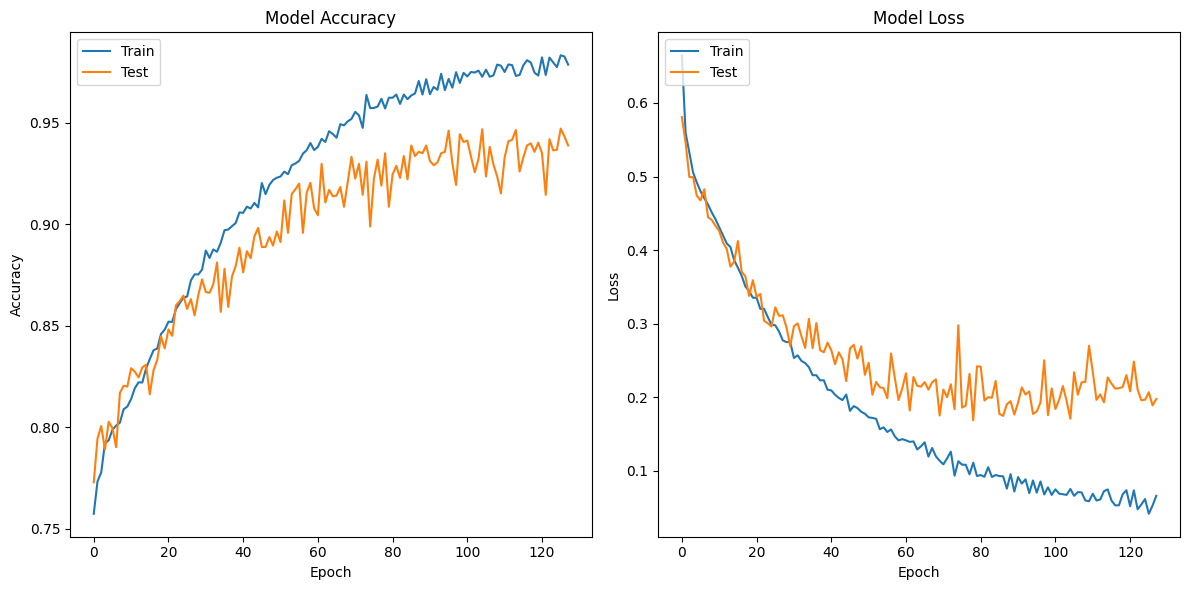

In [ ]:
# Plot the training curve
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

For Child Data

In [ ]:
folder_path = '/content/drive/MyDrive/child'

# List all files in the folder
files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the combined data
combined_child = pd.DataFrame()

Combine the files in the Child dataset

In [ ]:
# Looping through each file and concatenate the data
for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)

    # Drop specified columns
    df = df.drop(['HBGI', 'LBGI', 'BG', 'Risk'], axis=1)

    # Convert 'Time' column to datetime format
    df['Time'] = pd.to_datetime(df['Time'])

    # Extract time features
    df['Hour'] = df['Time'].dt.hour
    df['Minute'] = df['Time'].dt.minute
    df['Second'] = df['Time'].dt.second

    combined_child = pd.concat([combined_child, df], ignore_index=True)

# Display the combined DataFrame with time features
print(combined_child)

                    Time         CGM  CHO   insulin  Hour  Minute  Second
0    2023-10-25 06:00:00  114.591591  0.0  0.006575     6       0       0
1    2023-10-25 06:05:00  115.391832  0.0  0.006575     6       5       0
2    2023-10-25 06:10:00  116.780220  0.0  0.006575     6      10       0
3    2023-10-25 06:15:00  118.553025  0.0  0.006575     6      15       0
4    2023-10-25 06:20:00  120.431335  0.0  0.006575     6      20       0
...                  ...         ...  ...       ...   ...     ...     ...
7195 2023-10-30 05:35:00  113.361990  0.0  0.006625     5      35       0
7196 2023-10-30 05:40:00  114.071279  0.0  0.006625     5      40       0
7197 2023-10-30 05:45:00  114.666332  0.0  0.006625     5      45       0
7198 2023-10-30 05:50:00  115.140354  0.0  0.006625     5      50       0
7199 2023-10-30 05:55:00  115.494597  0.0  0.006625     5      55       0

[7200 rows x 7 columns]


Visualization Using heatmap

<ipython-input-426-2e94764e17ec>:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



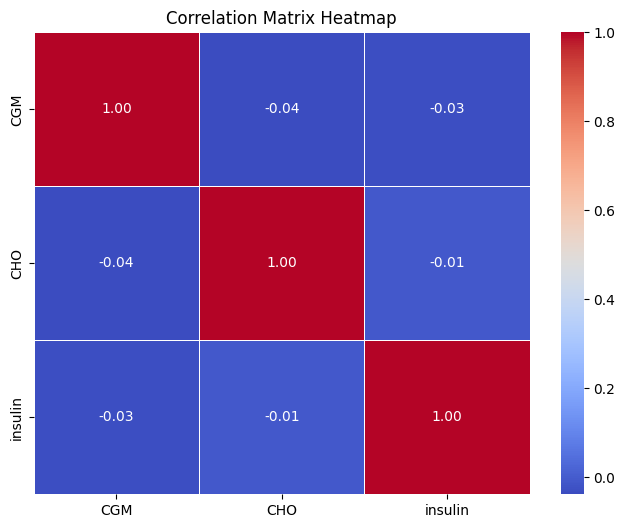

In [ ]:
# Select relevant columns
selected_columns = ['CGM', 'CHO', 'insulin', 'Time']
selected_data = combined_child[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Visualization Using Line Plot

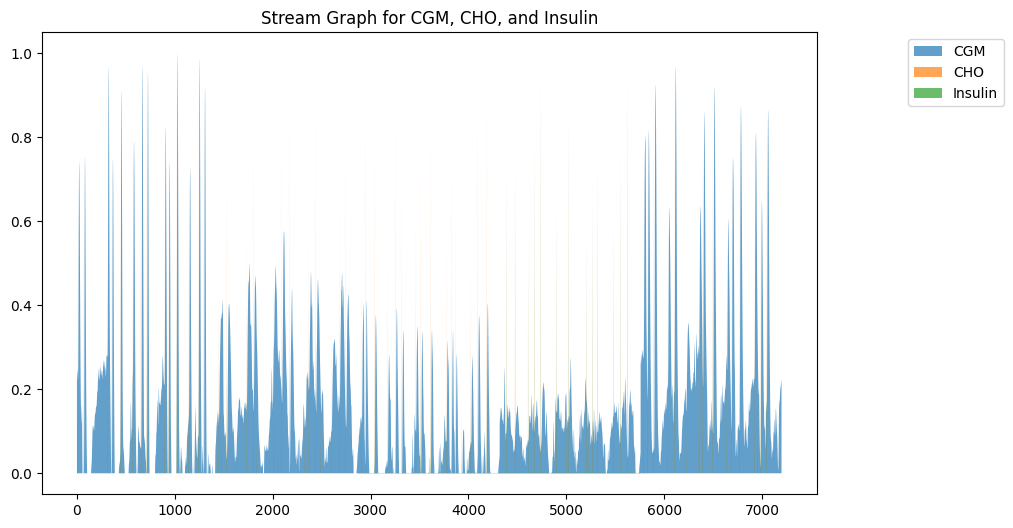

In [ ]:
# Select relevant columns
selected_columns = ['CGM', 'CHO', 'insulin']
selected_data = combined_child[selected_columns]

# Normalizing the data to be in the range [0, 1]
normalized_data = (selected_data - selected_data.min()) / (selected_data.max() - selected_data.min())

# Create a stream graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stream graph
ax.fill_between(normalized_data.index, normalized_data['CGM'], label='CGM', alpha=0.7)
ax.fill_between(normalized_data.index, normalized_data['CHO'], label='CHO', alpha=0.7)
ax.fill_between(normalized_data.index, normalized_data['insulin'], label='Insulin', alpha=0.7)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.title('Stream Graph for CGM, CHO, and Insulin')
plt.show()

Visualization Using Plotly

In [ ]:
# Select relevant columns
selected_columns = ['CGM', 'CHO', 'insulin']
selected_data = combined_child[selected_columns]

# Normalize the data to be in the range [0, 1]
normalized_data = (selected_data - selected_data.min()) / (selected_data.max() - selected_data.min())

# Create a line graph using Plotly Express
fig = px.line(normalized_data, x=normalized_data.index, y=selected_columns, labels={'index': 'Time', 'value': 'Normalized Values'},
              title='Line Graph for CGM, CHO, and Insulin')

# Show the figure
fig.show()

In [ ]:
# Drop the 'Time' column
combined_child = combined_child.drop('Time', axis=1)

# Display the updated DataFrame
print(combined_child)

             CGM  CHO   insulin  Hour  Minute  Second
0     114.591591  0.0  0.006575     6       0       0
1     115.391832  0.0  0.006575     6       5       0
2     116.780220  0.0  0.006575     6      10       0
3     118.553025  0.0  0.006575     6      15       0
4     120.431335  0.0  0.006575     6      20       0
...          ...  ...       ...   ...     ...     ...
7195  113.361990  0.0  0.006625     5      35       0
7196  114.071279  0.0  0.006625     5      40       0
7197  114.666332  0.0  0.006625     5      45       0
7198  115.140354  0.0  0.006625     5      50       0
7199  115.494597  0.0  0.006625     5      55       0

[7200 rows x 6 columns]


Feature Engineering Using a combination of CGM, CHO, and insulin

In [ ]:
combined_child['CGM_Lag1'] = combined_child['CGM'].shift(1)
combined_child['CHO_Lag1'] = combined_child['CHO'].shift(1)
combined_child['Insulin_Lag1'] = combined_child['insulin'].shift(1)

# Computing rolling mean for CGM, CHO, and Insulin over a window of 3 time points
combined_child['CGM_RollingMean3'] = combined_child['CGM'].rolling(window=3).mean()
combined_child['CHO_RollingMean3'] = combined_child['CHO'].rolling(window=3).mean()
combined_child['Insulin_RollingMean3'] = combined_child['insulin'].rolling(window=3).mean()

# Interaction features
combined_child['CGM_Insulin_Interact'] = combined_child['CGM'] * combined_child['insulin']
combined_child['CHO_Insulin_Interact'] = combined_child['CHO'] * combined_child['insulin']

# Creating a limited memory past (using the past 24 hours)
memory_window = 24
combined_child['Memory_Window_CGM_Mean'] = combined_child['CGM'].rolling(window=memory_window).mean()
combined_child['Memory_Window_CHO_Sum'] = combined_child['CHO'].rolling(window=memory_window).sum()
combined_child['Memory_Window_Insulin_Sum'] = combined_child['insulin'].rolling(window=memory_window).sum()

# Creating a future carbohydrates intake feature if it falls within 2 hours of prediction
future_window = 2
combined_child['Future_CHO'] = combined_child['CHO'].shift(-future_window)

# Combine features for the whole past data and limited memory past
combined_child['Whole_Past_CGM_Mean'] = combined_child['CGM'].expanding().mean()
combined_child['Whole_Past_CHO_Sum'] = combined_child['CHO'].expanding().sum()
combined_child['Whole_Past_Insulin_Sum'] = combined_child['insulin'].expanding().sum()

# Fill NaN values with the average of each column
combined_child = combined_child.fillna(combined_child.mean())

# Display the updated DataFrame
print(combined_child)

             CGM  CHO   insulin  Hour  Minute  Second    CGM_Lag1  CHO_Lag1  \
0     114.591591  0.0  0.006575     6       0       0   96.778436  0.127101   
1     115.391832  0.0  0.006575     6       5       0  114.591591  0.000000   
2     116.780220  0.0  0.006575     6      10       0  115.391832  0.000000   
3     118.553025  0.0  0.006575     6      15       0  116.780220  0.000000   
4     120.431335  0.0  0.006575     6      20       0  118.553025  0.000000   
...          ...  ...       ...   ...     ...     ...         ...       ...   
7195  113.361990  0.0  0.006625     5      35       0  112.579457  0.000000   
7196  114.071279  0.0  0.006625     5      40       0  113.361990  0.000000   
7197  114.666332  0.0  0.006625     5      45       0  114.071279  0.000000   
7198  115.140354  0.0  0.006625     5      50       0  114.666332  0.000000   
7199  115.494597  0.0  0.006625     5      55       0  115.140354  0.000000   

      Insulin_Lag1  CGM_RollingMean3  ...  Insulin_

Sequence Plot for CGM, CHO and insulin

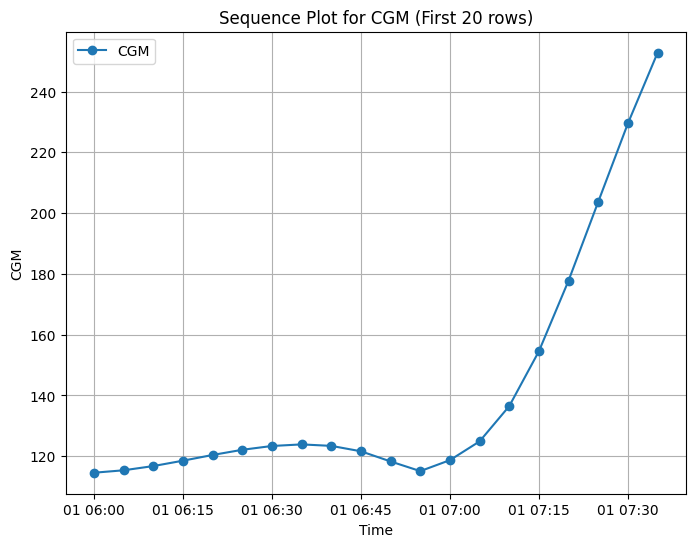

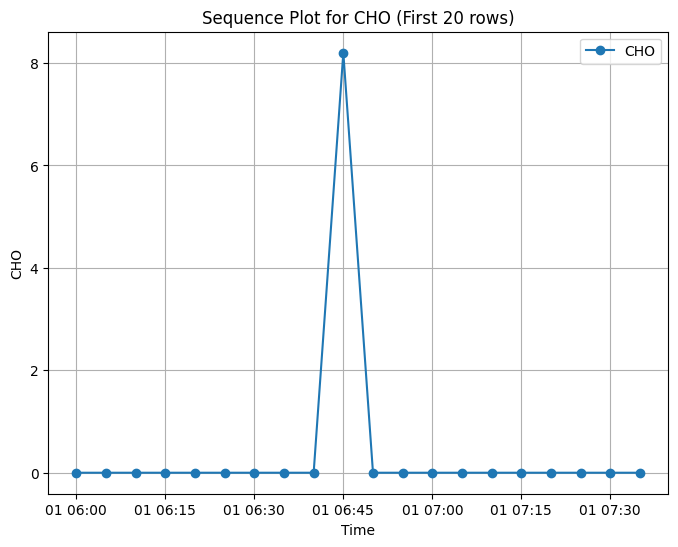

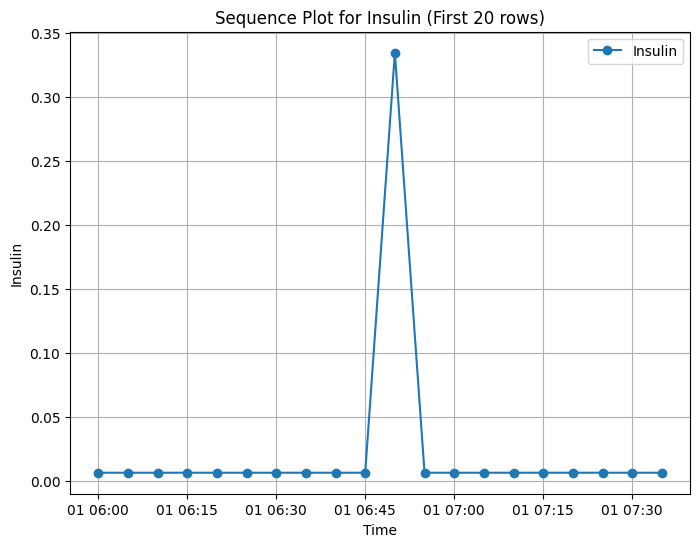

In [ ]:
# Create a synthetic 'Time' column
combined_child['Time'] = combined_child.apply(lambda row: pd.Timestamp(2023, 1, 1, int(row['Hour']), int(row['Minute'])), axis=1)

# Plotting sequence for CGM (first 20 rows)
plt.figure(figsize=(8, 6))
plt.plot(combined_child['Time'].head(20), combined_child['CGM'].head(20), label='CGM', marker='o')
plt.title('Sequence Plot for CGM (First 20 rows)')
plt.xlabel('Time')
plt.ylabel('CGM')
plt.legend()
plt.grid(True)
plt.show()

# Plotting sequence for CHO (first 20 rows)
plt.figure(figsize=(8, 6))
plt.plot(combined_child['Time'].head(20), combined_child['CHO'].head(20), label='CHO', marker='o')
plt.title('Sequence Plot for CHO (First 20 rows)')
plt.xlabel('Time')
plt.ylabel('CHO')
plt.legend()
plt.grid(True)
plt.show()

# Plotting sequence for Insulin (first 20 rows)
plt.figure(figsize=(8, 6))
plt.plot(combined_child['Time'].head(20), combined_child['insulin'].head(20), label='Insulin', marker='o')
plt.title('Sequence Plot for Insulin (First 20 rows)')
plt.xlabel('Time')
plt.ylabel('Insulin')
plt.legend()
plt.grid(True)
plt.show()

We drop the 'Time' column created again

In [ ]:
# Drop the 'Time' column
combined_child = combined_child.drop('Time', axis=1)

# Display the updated DataFrame
print(combined_child)

             CGM  CHO   insulin  Hour  Minute  Second    CGM_Lag1  CHO_Lag1  \
0     114.591591  0.0  0.006575     6       0       0   96.778436  0.127101   
1     115.391832  0.0  0.006575     6       5       0  114.591591  0.000000   
2     116.780220  0.0  0.006575     6      10       0  115.391832  0.000000   
3     118.553025  0.0  0.006575     6      15       0  116.780220  0.000000   
4     120.431335  0.0  0.006575     6      20       0  118.553025  0.000000   
...          ...  ...       ...   ...     ...     ...         ...       ...   
7195  113.361990  0.0  0.006625     5      35       0  112.579457  0.000000   
7196  114.071279  0.0  0.006625     5      40       0  113.361990  0.000000   
7197  114.666332  0.0  0.006625     5      45       0  114.071279  0.000000   
7198  115.140354  0.0  0.006625     5      50       0  114.666332  0.000000   
7199  115.494597  0.0  0.006625     5      55       0  115.140354  0.000000   

      Insulin_Lag1  CGM_RollingMean3  ...  Insulin_

Stating the conditions for Normal, Hypoglycaemia and Hyperglycaemia

In [ ]:
combined_child['Target'] = 1  # Initialize the target column with 1 for normal

# Defining conditions for hypoglycemia and hyperglycemia
hypoglycemia_condition = (combined_child['CGM'].shift(-2 * (60 // 5)) < 70)
hyperglycemia_condition = (combined_child['CGM'].shift(-2 * (60 // 5)) > 180)

# Set the target column based on the conditions
combined_child.loc[hypoglycemia_condition, 'Target'] = 0  # Set to 0 for hypoglycemia
combined_child.loc[hyperglycemia_condition, 'Target'] = 2   # Set to 2 for hyperglycemia

# Ensuring that no future CGM data is used for prediction
combined_child['CGM'] = combined_child['CGM'].shift(1)

# Drop rows with NaN values in the 'CGM' column after the adjustment
combined_child = combined_child.dropna(subset=['CGM'])

# Display the updated DataFrame with the target column
print(combined_child)

             CGM  CHO   insulin  Hour  Minute  Second    CGM_Lag1  CHO_Lag1  \
1     114.591591  0.0  0.006575     6       5       0  114.591591       0.0   
2     115.391832  0.0  0.006575     6      10       0  115.391832       0.0   
3     116.780220  0.0  0.006575     6      15       0  116.780220       0.0   
4     118.553025  0.0  0.006575     6      20       0  118.553025       0.0   
5     120.431335  0.0  0.006575     6      25       0  120.431335       0.0   
...          ...  ...       ...   ...     ...     ...         ...       ...   
7195  112.579457  0.0  0.006625     5      35       0  112.579457       0.0   
7196  113.361990  0.0  0.006625     5      40       0  113.361990       0.0   
7197  114.071279  0.0  0.006625     5      45       0  114.071279       0.0   
7198  114.666332  0.0  0.006625     5      50       0  114.666332       0.0   
7199  115.140354  0.0  0.006625     5      55       0  115.140354       0.0   

      Insulin_Lag1  CGM_RollingMean3  ...  CGM_Insu

In [ ]:
combined_child.describe().T

,count,mean,std,min,25%,50%,75%,max
CGM,7199.0,96.778436,62.083961,39.000000,53.718693,80.426730,115.626023,384.106087
CHO,7199.0,0.127101,1.282311,0.000000,0.000000,0.000000,0.000000,18.000000
insulin,7199.0,0.015309,0.092719,0.006575,0.006583,0.006625,0.008208,2.322867
Hour,7199.0,11.500764,6.922845,0.000000,5.500000,12.000000,17.500000,23.000000
Minute,7199.0,27.503820,17.259617,0.000000,15.000000,30.000000,42.500000,55.000000
Second,7199.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CGM_Lag1,7199.0,96.778436,62.083961,39.000000,53.718693,80.426730,115.626023,384.106087
CHO_Lag1,7199.0,0.127101,1.282311,0.000000,0.000000,0.000000,0.000000,18.000000
Insulin_Lag1,7199.0,0.015309,0.092719,0.006575,0.006583,0.006625,0.008208,2.322867
CGM_RollingMean3,7199.0,96.775941,61.817135,39.000000,53.771450,80.626824,115.809344,380.932385


In [ ]:
features = combined_child.drop(['Target'], axis=1).values  # Drop Target' column
target = combined_child['Target'].values

In [ ]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
target_categorical = to_categorical(target)

# Define the window size
window_size = 10

# Creating sequences of input features and corresponding target variable
X, y = [], []
for i in range(len(features_scaled) - window_size):
    X.append(features_scaled[i:i+window_size])
    y.append(target_categorical[i+window_size])

X, y = np.array(X), np.array(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5751, 10, 21)
X_test shape: (1438, 10, 21)
y_train shape: (5751, 3)
y_test shape: (1438, 3)


Training

In [ ]:
# Create an LSTM model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(window_size, features.shape[1])))
model.add(Dense(3, activation='softmax'))  # 3 classes for hypoglycemia, normal, and hyperglycemia

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=128, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/128
180/180 [==============================] - 4s 15ms/step - loss: 0.8420 - accuracy: 0.6089 - val_loss: 0.7737 - val_accuracy: 0.6328
Epoch 2/128
180/180 [==============================] - 2s 10ms/step - loss: 0.6720 - accuracy: 0.6921 - val_loss: 0.6362 - val_accuracy: 0.7156
Epoch 3/128
180/180 [==============================] - 2s 10ms/step - loss: 0.6072 - accuracy: 0.7305 - val_loss: 0.5875 - val_accuracy: 0.7316
Epoch 4/128
180/180 [==============================] - 2s 11ms/step - loss: 0.5680 - accuracy: 0.7597 - val_loss: 0.5265 - val_accuracy: 0.7823
Epoch 5/128
180/180 [==============================] - 2s 10ms/step - loss: 0.5358 - accuracy: 0.7727 - val_loss: 0.5329 - val_accuracy: 0.7524
Epoch 6/128
180/180 [==============================] - 2s 13ms/step - loss: 0.5138 - accuracy: 0.7820 - val_loss: 0.4708 - val_accuracy: 0.7928
Epoch 7/128
180/180 [==============================] - 2s 13ms/step - loss: 0.5090 - accuracy: 0.7870 - val_loss: 0.5155 - val_accuracy:

Evaluation

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy on the test set:", accuracy)

45/45 [==============================] - 0s 4ms/step
Accuracy on the test set: 0.9513212795549374


In [ ]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       578
           1       0.96      0.95      0.95       729
           2       0.93      0.95      0.94       131

    accuracy                           0.95      1438
   macro avg       0.95      0.95      0.95      1438
weighted avg       0.95      0.95      0.95      1438



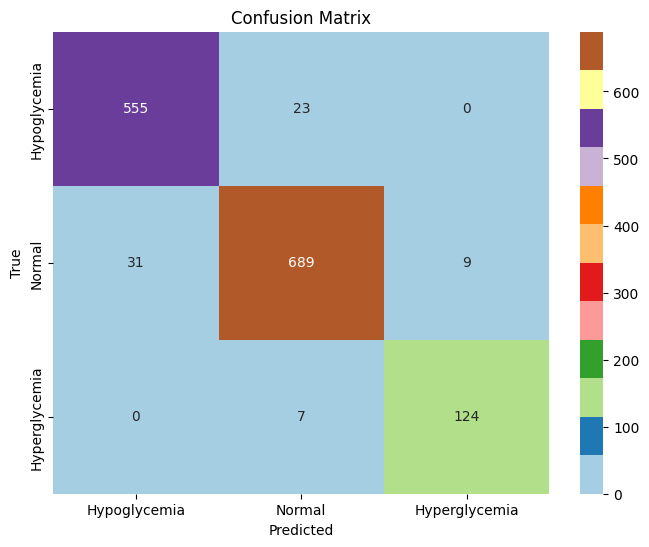

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Paired', xticklabels=['Hypoglycemia', 'Normal', 'Hyperglycemia'],
            yticklabels=['Hypoglycemia', 'Normal', 'Hyperglycemia'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

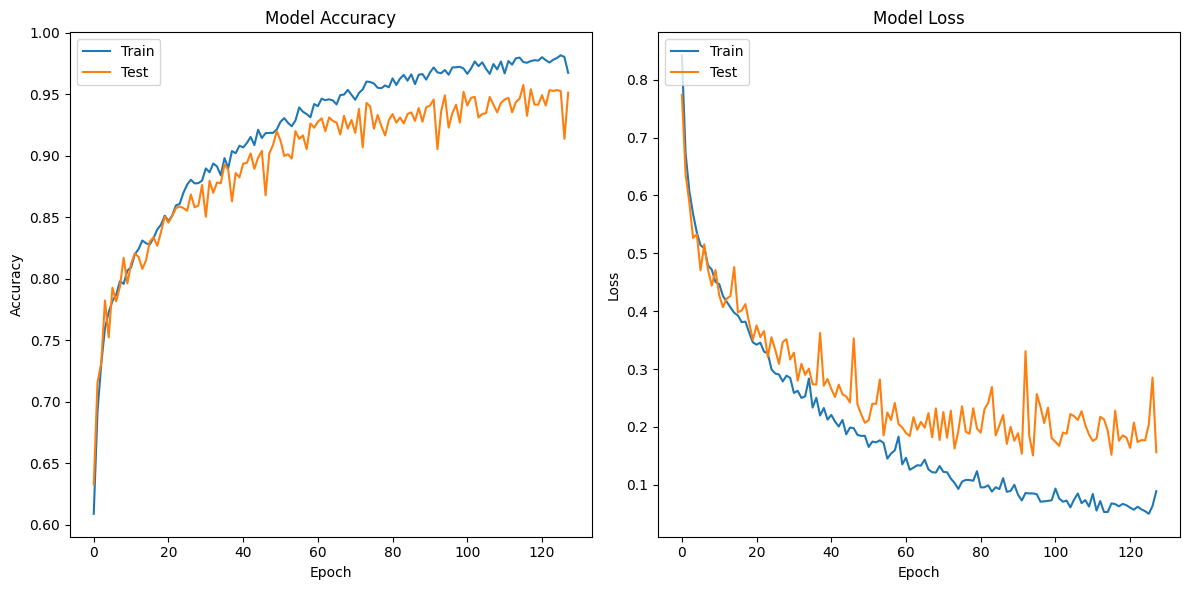

In [ ]:
# Plot the training curve
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# MODEL 2: RANDOM FOREST

Adolescent Data

We used the same preprocessing technique in LSTM and went ahead with the remaining section

In [ ]:
# importing the RF-classifier library
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = combined_adolescent.drop(['Target'], axis=1)
y = combined_adolescent['Target']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training

In [ ]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluation

In [ ]:
# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_output)

Accuracy: 0.9637896825396826
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.89       167
           1       0.97      0.99      0.98      1568
           2       0.95      0.91      0.93       281

    accuracy                           0.96      2016
   macro avg       0.95      0.91      0.93      2016
weighted avg       0.96      0.96      0.96      2016



In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 141   26    0]
 [  10 1545   13]
 [   0   24  257]]


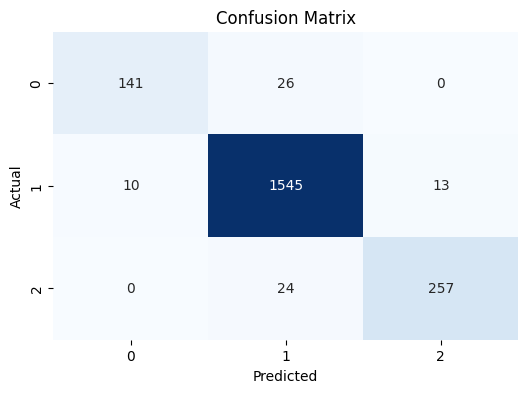

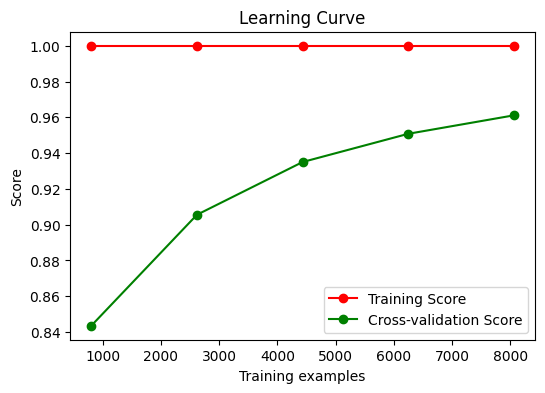

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Training Curve
def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title("Learning Curve")
    plt.show()

# Assuming you have X and y from your dataset
X, y = shuffle(X, y, random_state=42)
plot_learning_curve(rf_classifier, X, y)

Adult Data

In [ ]:
X = combined_adult.drop(['Target'], axis=1)
y = combined_adult['Target']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training

In [ ]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=250, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=42)

Evaluation

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_output)

Accuracy: 0.9631944444444445
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       331
           1       0.97      0.98      0.98      2209
           2       0.93      0.89      0.91       340

    accuracy                           0.96      2880
   macro avg       0.95      0.92      0.94      2880
weighted avg       0.96      0.96      0.96      2880



In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 299   32    0]
 [  14 2174   21]
 [   0   39  301]]


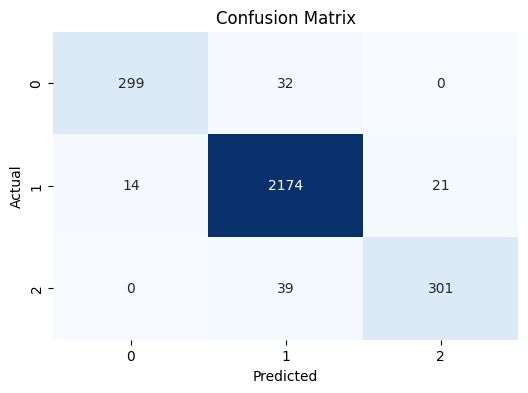

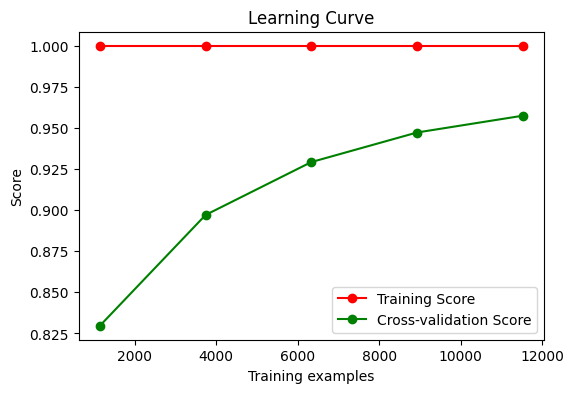

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Training Curve
def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title("Learning Curve")
    plt.show()

X, y = shuffle(X, y, random_state=42)
plot_learning_curve(rf_classifier, X, y)

Child Data

In [ ]:
X = combined_child.drop(['Target'], axis=1).values
y = combined_child['Target'].values

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training

In [ ]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=250, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=42)

Evaluation

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_output)

Accuracy: 0.9625
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       591
           1       0.96      0.96      0.96       728
           2       0.91      0.93      0.92       121

    accuracy                           0.96      1440
   macro avg       0.95      0.95      0.95      1440
weighted avg       0.96      0.96      0.96      1440



In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[572  19   0]
 [ 15 702  11]
 [  0   9 112]]


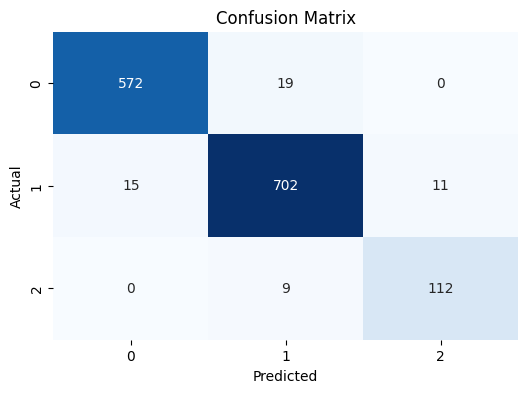

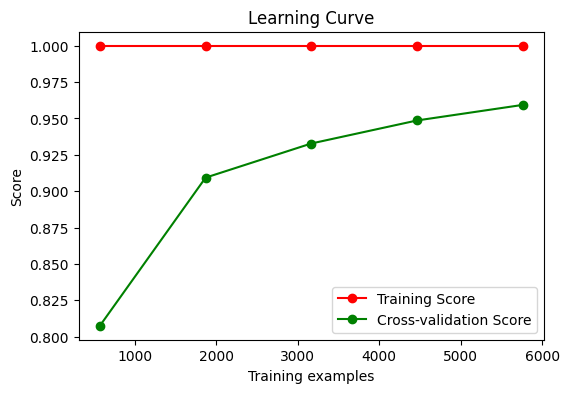

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Training Curve
def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title("Learning Curve")
    plt.show()

X, y = shuffle(X, y, random_state=42)
plot_learning_curve(rf_classifier, X, y)

# MODEL 3: Support Vector Machine (SVM)

FOR ADOLESCENCE DATA

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
X = combined_adolescent.drop(['Target'], axis=1)
y = combined_adolescent['Target']

In [ ]:
X.shape

(10079, 21)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training

In [ ]:
# Train SVM classifier
svm_classifier = SVC(kernel='rbf', C=50.0)
svm_classifier.fit(X_train, y_train)

SVC(C=50.0)

POrediction

In [ ]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

In [ ]:
y_pred.shape, y_test.shape

((2016,), (2016,))

SVM Accuracy: 79.07%
SVM Confusion Matrix:
[[   0  167    0]
 [   0 1567    1]
 [   4  250   27]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       167
           1       0.79      1.00      0.88      1568
           2       0.96      0.10      0.17       281

    accuracy                           0.79      2016
   macro avg       0.58      0.37      0.35      2016
weighted avg       0.75      0.79      0.71      2016



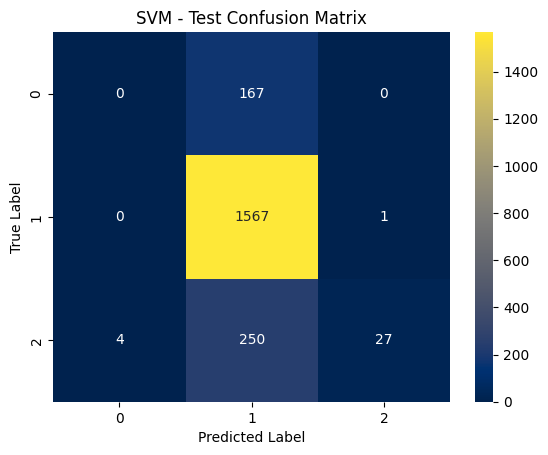

In [ ]:
# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred)
conf_mat_svm = confusion_matrix(y_test, y_pred)
classification_rep_svm = classification_report(y_test, y_pred)

# Print results
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')
print('SVM Confusion Matrix:')
print(conf_mat_svm)
print('SVM Classification Report:')
print(classification_rep_svm)

# Visualize Confusion Matrix
sns.heatmap(conf_mat_svm, annot=True, fmt='d', cmap='cividis')
plt.title('SVM - Test Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Adult Data

We have used the same preprocessing technique as used in the LSTM model and continued the remaining sections

In [ ]:
X = combined_adult.drop(['Target'], axis=1)
y = combined_adult['Target']

In [ ]:
X.shape, y.shape

((14399, 21), (14399,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((11519, 21), (11519,))

In [ ]:
X_test.shape, y_test.shape

((2880, 21), (2880,))

Training

In [ ]:
# Train SVM classifier
svm_classifier = SVC(kernel='rbf', C=50.0)
svm_classifier.fit(X_train, y_train)

SVC(C=50.0)

Prediction

In [ ]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

In [ ]:
y_pred.shape, y_test.shape

((2880,), (2880,))

Evaluation

SVM Accuracy: 77.01%
SVM Confusion Matrix:
[[  21  310    0]
 [  19 2186    4]
 [   2  327   11]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.06      0.11       331
           1       0.77      0.99      0.87      2209
           2       0.73      0.03      0.06       340

    accuracy                           0.77      2880
   macro avg       0.67      0.36      0.35      2880
weighted avg       0.74      0.77      0.69      2880



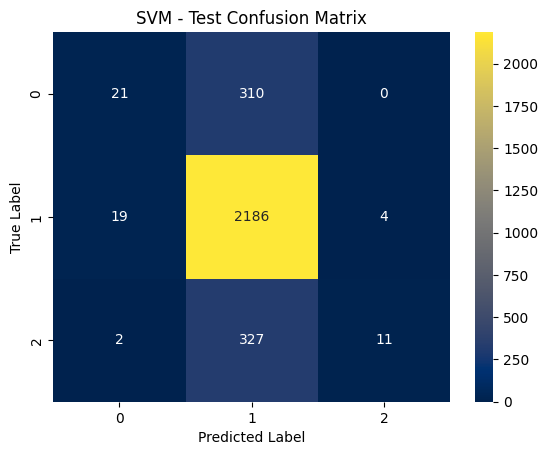

In [ ]:
# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred)
conf_mat_svm = confusion_matrix(y_test, y_pred)
classification_rep_svm = classification_report(y_test, y_pred)

# Print results
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')
print('SVM Confusion Matrix:')
print(conf_mat_svm)
print('SVM Classification Report:')
print(classification_rep_svm)

# Visualize Confusion Matrix
sns.heatmap(conf_mat_svm, annot=True, fmt='d', cmap='cividis')
plt.title('SVM - Test Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Child Data

In [ ]:
X = combined_child.drop(['Target'], axis=1)
y = combined_child['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training

In [ ]:
# Train SVM classifier
svm_classifier = SVC(kernel='rbf', C=50.0)
svm_classifier.fit(X_train, y_train)

SVC(C=50.0)

Prediction

In [ ]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

Evaluation

SVM Accuracy: 73.54%
SVM Confusion Matrix:
[[455 136   0]
 [128 599   1]
 [ 28  88   5]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       591
           1       0.73      0.82      0.77       728
           2       0.83      0.04      0.08       121

    accuracy                           0.74      1440
   macro avg       0.77      0.54      0.54      1440
weighted avg       0.74      0.74      0.71      1440



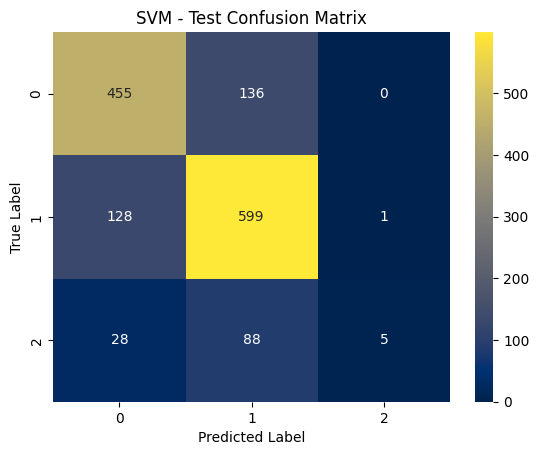

In [ ]:
# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred)
conf_mat_svm = confusion_matrix(y_test, y_pred)
classification_rep_svm = classification_report(y_test, y_pred)

# Print results
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')
print('SVM Confusion Matrix:')
print(conf_mat_svm)
print('SVM Classification Report:')
print(classification_rep_svm)

# Visualize Confusion Matrix
sns.heatmap(conf_mat_svm, annot=True, fmt='d', cmap='cividis')
plt.title('SVM - Test Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()